# Exercise: Using `Plotly` to create a simple bar chart

In this exercise, you'll be practicing the same 20 and 50-day moving average chart from the `matplotlib` exercise, but using `plotly`. 

**Download historical data for 2 years from one ticker**

Use the YFinance package to download 2 years of data for any ticker you'd like. 

In [31]:
!pip install --upgrade yfinance
from curl_cffi import requests
session = requests.Session(impersonate="chrome")
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

In [32]:
stock_ticker = 'AAPL'
start_date = '2020-01-01' # use format YYYY-MM-DD
end_date = '2022-01-01'

data = yf.download(
    stock_ticker,
    start=start_date,
    end=end_date,
    session=session,
    auto_adjust=True,
    multi_level_index=False) # replace ... inside this function with the correct parameters in order to get your data

[*********************100%***********************]  1 of 1 completed


**Calculate the 20-day and 50-day moving average**

Use Pandas methods to calculate the 20-day and 50-day moving averages for your ticker.

In [34]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538490,72.598869,71.292281,71.545867,135480400
2020-01-03,71.833313,72.594079,71.608707,71.765690,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


In [35]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

**Create a chart in `plotly` that shows both the 20-day and 50-day rolling average, plus the closing price, on the same graph**

Creating plots in `Plotly` takes a little more effort than in `matplotlib`. You'll be creating the same chart as you did in the prior exercise, but now using `plotly`. 

Can you add these 3 variables to the same line chart: (1) closing price, (2) 20-day moving average, and (3) 50-day moving average? 

Recall that in `plotly` each variable is added using a `trace`. 

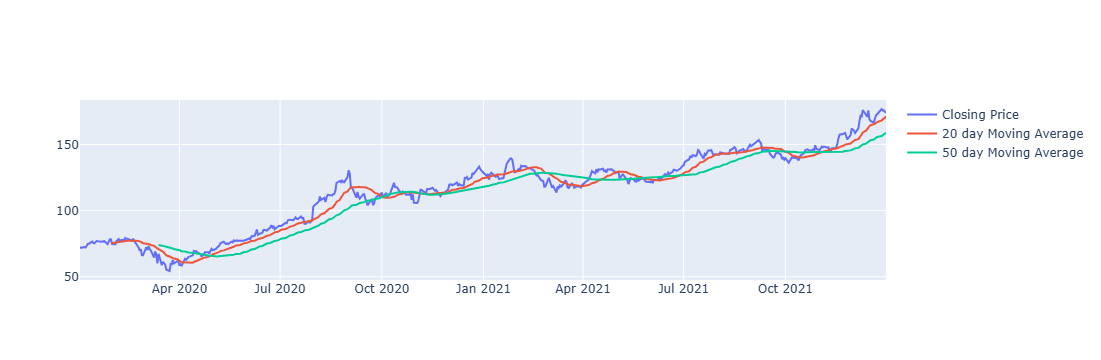

In [37]:
fig = go.Figure()

# add closing price
fig.add_trace(
    go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Price')
) # replace ...

# adding 20-day moving avg
fig.add_trace(
    go.Scatter(x=data.index, y=data['MA_20'], mode='lines', name='20 day Moving Average')
) # replace ...

# add 50-day moving avg 
fig.add_trace(
    go.Scatter(x=data.index, y=data['MA_50'], mode='lines', name='50 day Moving Average')    
) # replace ...

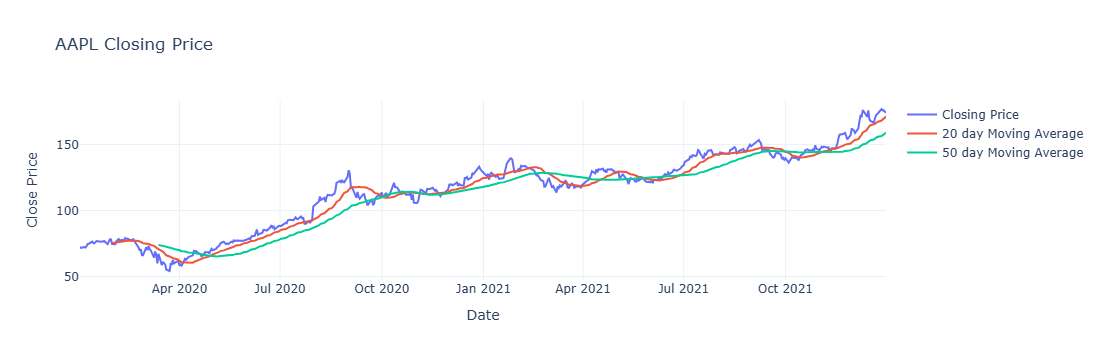

In [38]:
# customize your layout

fig.update_layout(
        title = 'AAPL Closing Price',
        xaxis_title = 'Date',
        yaxis_title = 'Close Price',
        template = 'plotly_white'
)

fig.show()